### Data Shifting Experiment

### MIMIC CXR

* [Dataset](https://physionet.org/content/mimic-cxr/2.0.0/)

* [Original Paper](https://www.nature.com/articles/s41597-019-0322-0)

In [ ]:
%cd ..

In [2]:
import os
import numpy as np
import pandas as pd

from src.classifiers import preprocess_data, process_labels, split_data
from src.classifiers import VQADataset
from torch.utils.data import DataLoader
from src.classifiers import train_early_fusion, train_late_fusion

from utils import normalize_embeddings, modify_and_normalize_embeddings, visualize_embeddings, plot_results, update_column_names

In [3]:
PATH = 'Embeddings/mimic/'
FILE = 'embeddings.csv'
DATASET = 'mimic'

batch_size = 32

output_size = 4
multilabel = False

num_epochs = 50

In [4]:
df = pd.read_csv(os.path.join(PATH, FILE))
df.disease_label = df.disease_label.astype(str)
df.head()

DR_ICDR  DR_2 DR_3  split    text_1    text_2    text_3    text_4  \
0        0     0    0  train -0.230976 -0.649306  0.351964  4.827357   
1        0     0    0   test -0.188945 -0.516513  0.458152  4.739528   
2        0     0    0  train -0.690169 -0.710446  0.562674  4.909813   
3        0     0    0  train -0.748607 -0.507840  0.673932  4.859914   
4        0     0    0   test -0.575935 -0.649872  0.722284  5.002320   

     text_5    text_6  ...  image_1526  image_1527  image_1528  image_1529  \
0 -0.652423 -1.548302  ...   -0.321200   -1.895818    1.196687    1.986741   
1 -0.524881 -1.532104  ...   -0.007468   -1.980681    1.131782    1.909355   
2 -0.266062 -1.765767  ...   -0.016114   -1.694332    1.244229    2.120176   
3 -0.071180 -1.733303  ...    0.268266   -1.657310    0.901805    1.809422   
4 -0.277846 -1.737345  ...    0.141679   -1.476505    1.064863    2.015743   

   image_1530  image_1531  image_1532  image_1533  image_1534  image_1535  
0    1.047986    1.503189    2.945741    2.566396    0.100422    0.039841  
1    1.482123    1.014651    2.604582    2.267700    0.133543   -0.243325  
2    1.228228    1.084082    2.284241    2.441288    0.548136   -0.184525  
3    1.395210    0.949156    2.093713    2.066097    0.544640   -0.578559  
4    1.148500    1.598261    2.477580    2.682755   -0.003177   -0.187033  

[5 rows x 5636 columns]

In [5]:
# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column]
image_columns = [column for column in df.columns if 'image' in column]
label_columns = 'disease_label'

### Run Experiments

##################################################  Shift -1  ##################################################


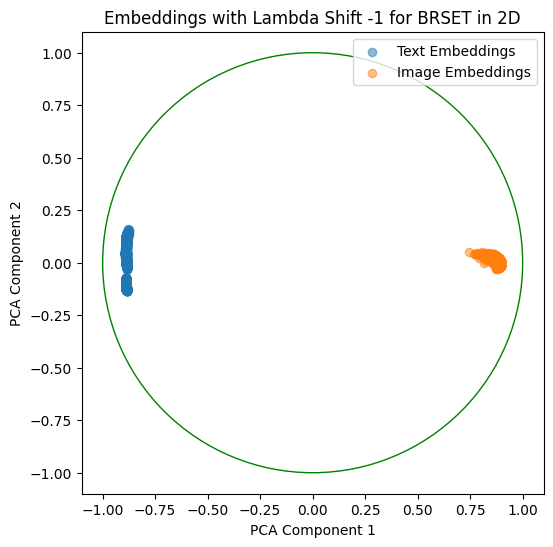

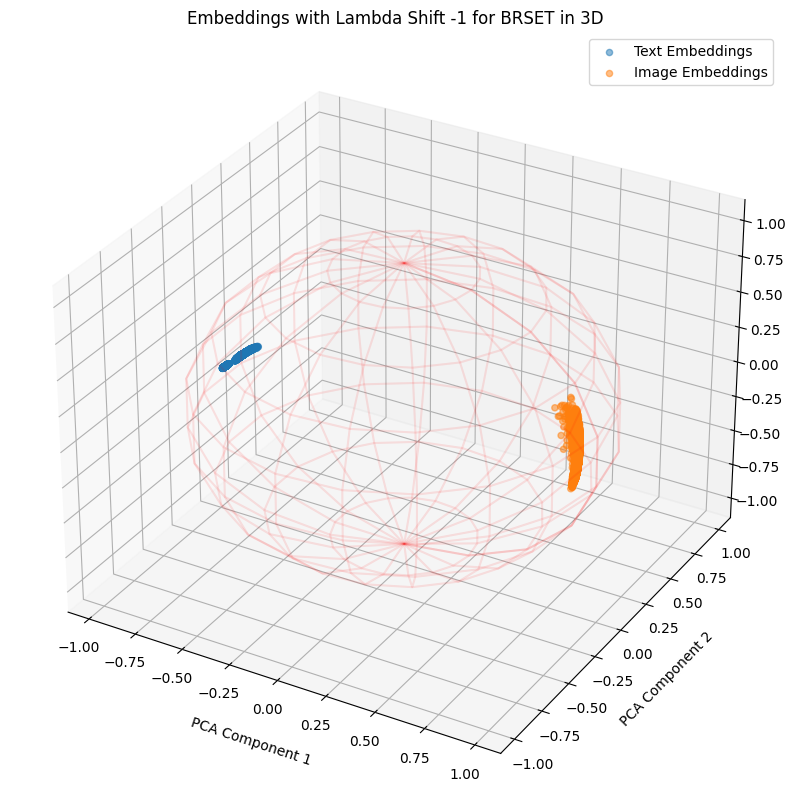

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721667
Average Training Time per Epoch: 1.86 seconds
Total Training Time per Epoch: 92.92 seconds
Average Inference Time per Epoch: 0.39 seconds
Total Inference Time per Epoch: 19.25 seconds


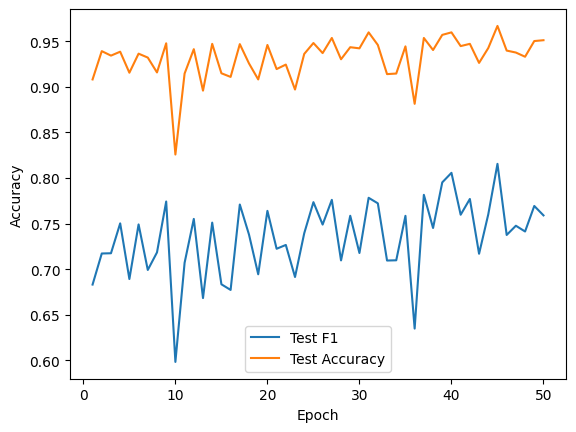

Best Accuracy: {'Acc': 0.9668100799016595, 'F1': 0.8155091552568176, 'Epoch': 45}
Best Macro-F1: {'Acc': 0.9668100799016595, 'F1': 0.8155091552568176, 'Epoch': 45}
Training Late Fusion Model:
The number of parameters of the model are: 361219
Average Training Time per Epoch: 2.00 seconds
Total Training Time per Epoch: 100.14 seconds
Average Inference Time per Epoch: 0.39 seconds
Total Inference Time per Epoch: 19.31 seconds


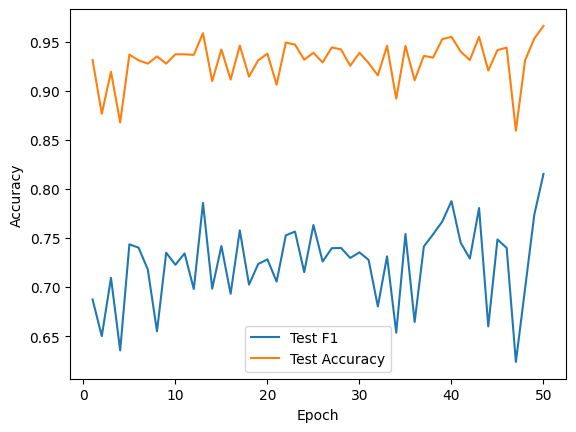

Best Accuracy: {'Acc': 0.9658881376767056, 'F1': 0.8151320800077215, 'Epoch': 50}
Best Macro-F1: {'Acc': 0.9658881376767056, 'F1': 0.8151320800077215, 'Epoch': 50}
##################################################  Shift -0.8  ##################################################


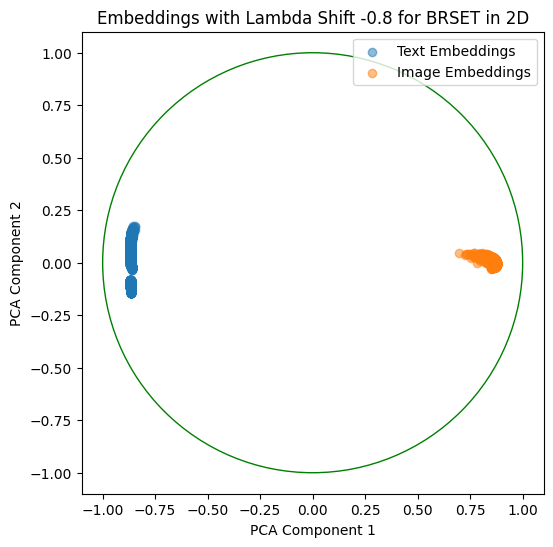

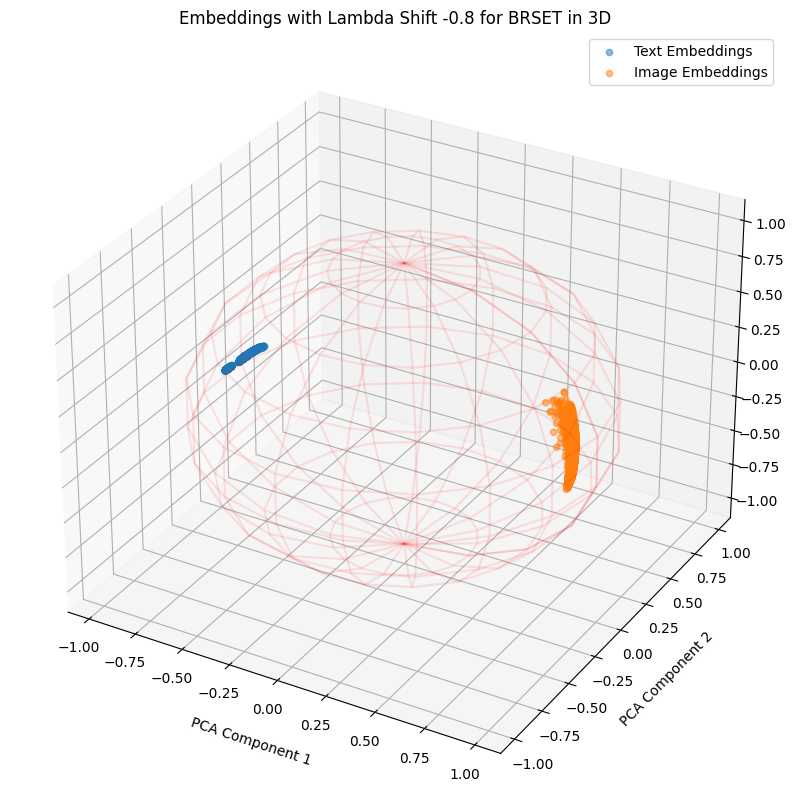

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721667
Average Training Time per Epoch: 1.92 seconds
Total Training Time per Epoch: 95.81 seconds
Average Inference Time per Epoch: 0.45 seconds
Total Inference Time per Epoch: 22.58 seconds


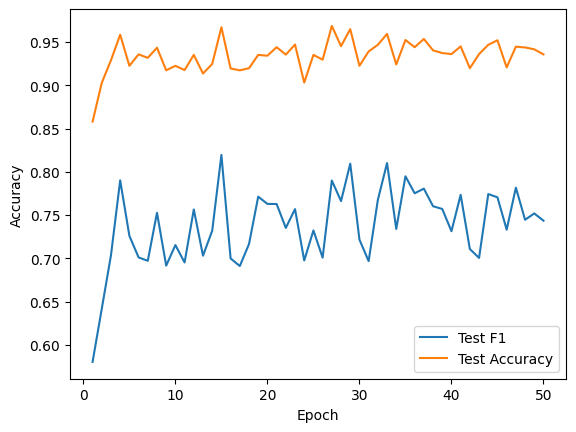

Best Accuracy: {'Acc': 0.9686539643515673, 'F1': 0.7899733450177092, 'Epoch': 27}
Best Macro-F1: {'Acc': 0.9671173939766441, 'F1': 0.8195753955557876, 'Epoch': 15}
Training Late Fusion Model:
The number of parameters of the model are: 361219
Average Training Time per Epoch: 2.02 seconds
Total Training Time per Epoch: 100.99 seconds
Average Inference Time per Epoch: 0.45 seconds
Total Inference Time per Epoch: 22.46 seconds


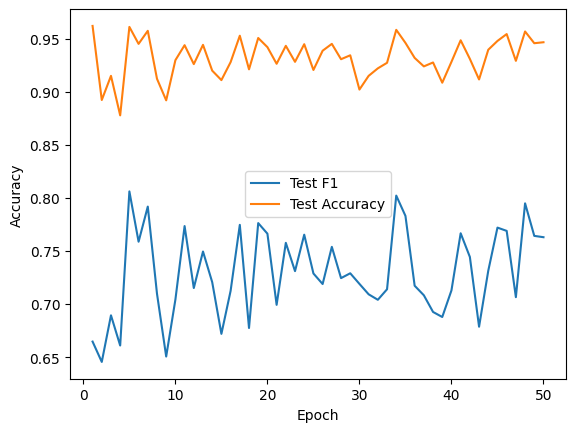

Best Accuracy: {'Acc': 0.9618930547019053, 'F1': 0.6646593865775544, 'Epoch': 1}
Best Macro-F1: {'Acc': 0.9609711124769514, 'F1': 0.8060799109351806, 'Epoch': 5}
##################################################  Shift -0.6  ##################################################


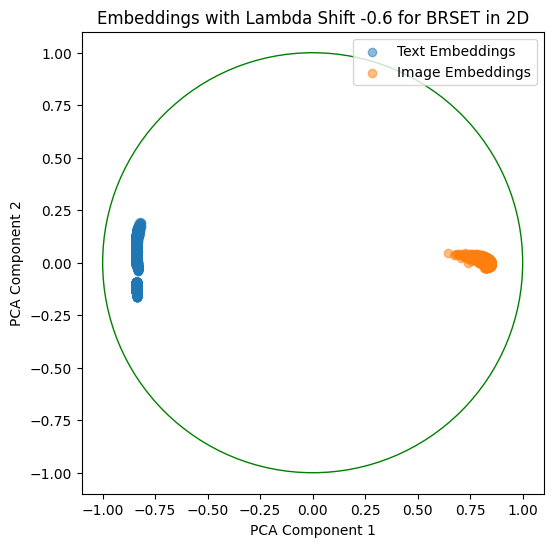

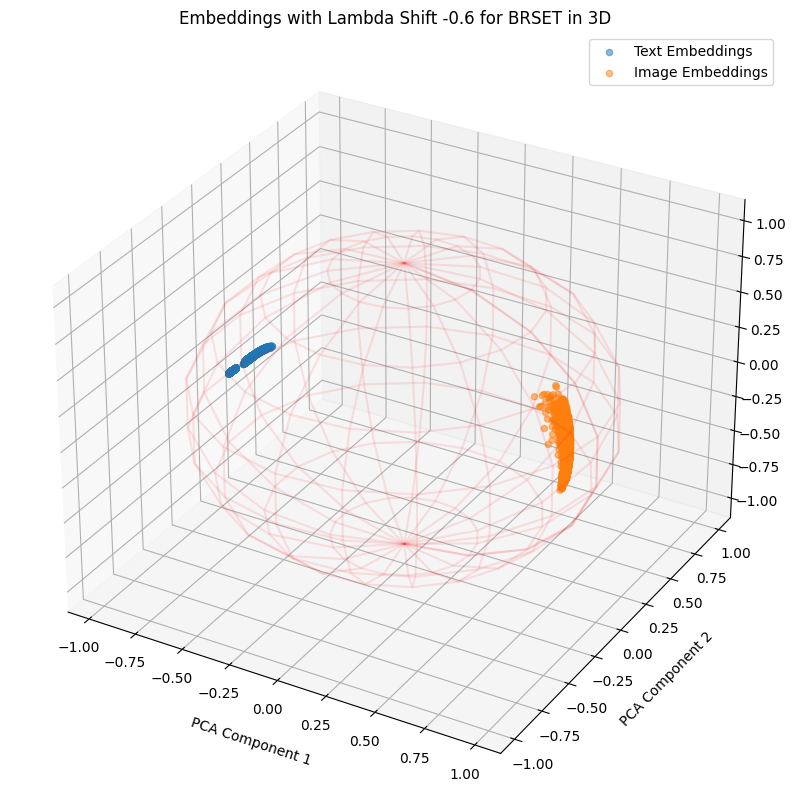

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721667
Average Training Time per Epoch: 1.99 seconds
Total Training Time per Epoch: 99.34 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.08 seconds


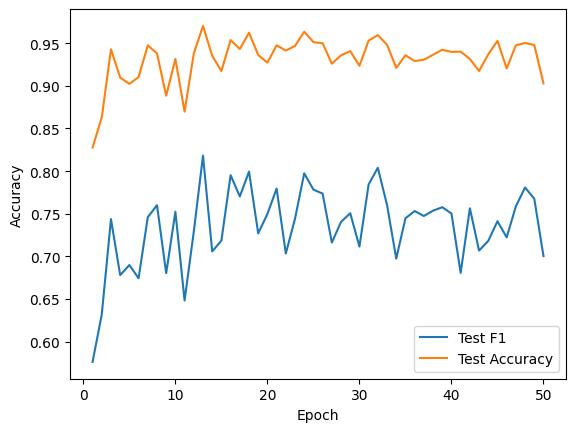

Best Accuracy: {'Acc': 0.9701905347264905, 'F1': 0.8181626002904973, 'Epoch': 13}
Best Macro-F1: {'Acc': 0.9701905347264905, 'F1': 0.8181626002904973, 'Epoch': 13}
Training Late Fusion Model:
The number of parameters of the model are: 361219
Average Training Time per Epoch: 2.08 seconds
Total Training Time per Epoch: 104.11 seconds
Average Inference Time per Epoch: 0.49 seconds
Total Inference Time per Epoch: 24.67 seconds


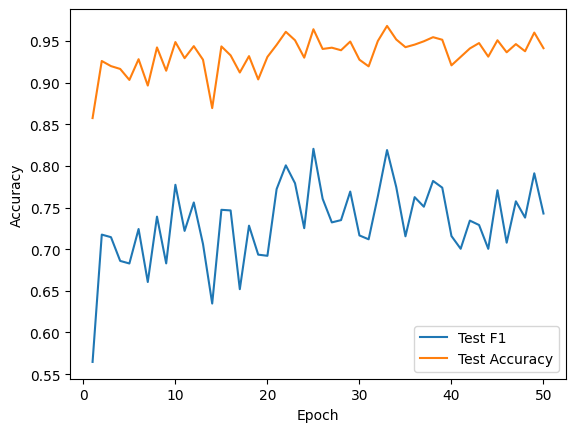

Best Accuracy: {'Acc': 0.968039336201598, 'F1': 0.8190158576042021, 'Epoch': 33}
Best Macro-F1: {'Acc': 0.9640442532267978, 'F1': 0.8205065211358237, 'Epoch': 25}
##################################################  Shift -0.4  ##################################################


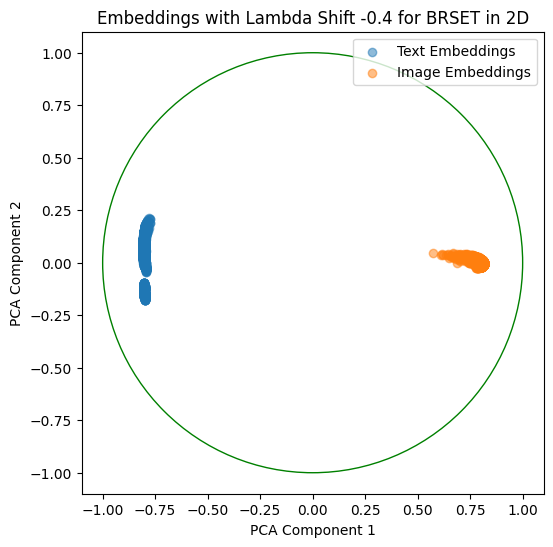

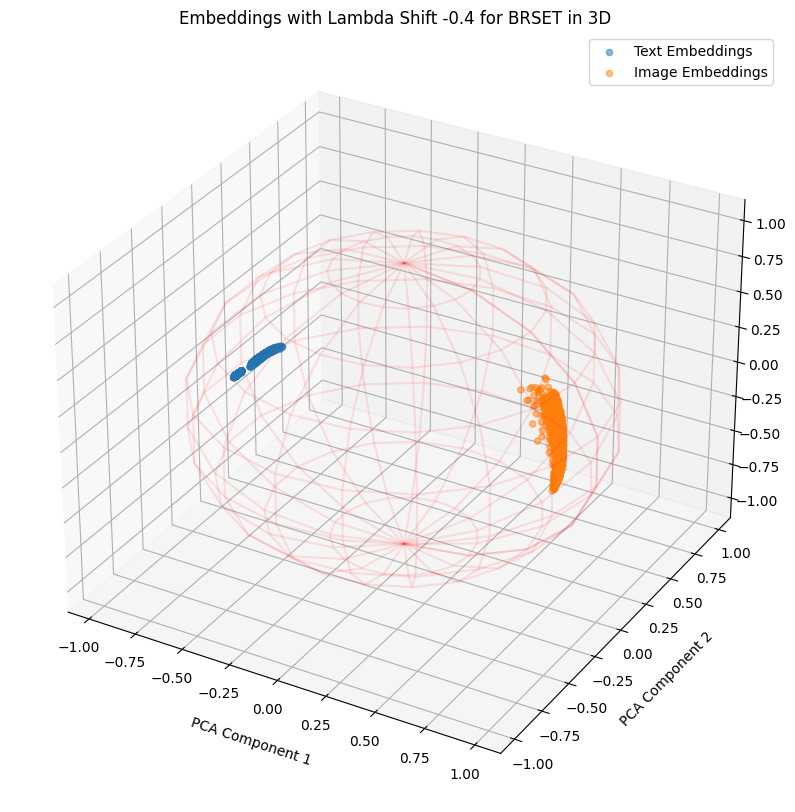

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721667
Average Training Time per Epoch: 1.92 seconds
Total Training Time per Epoch: 96.16 seconds
Average Inference Time per Epoch: 0.49 seconds
Total Inference Time per Epoch: 24.46 seconds


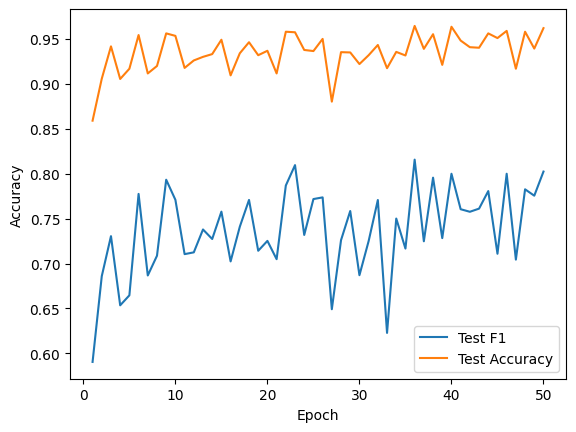

Best Accuracy: {'Acc': 0.9643515673017824, 'F1': 0.8155999007815903, 'Epoch': 36}
Best Macro-F1: {'Acc': 0.9643515673017824, 'F1': 0.8155999007815903, 'Epoch': 36}
Training Late Fusion Model:
The number of parameters of the model are: 361219
Average Training Time per Epoch: 2.05 seconds
Total Training Time per Epoch: 102.51 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 24.81 seconds


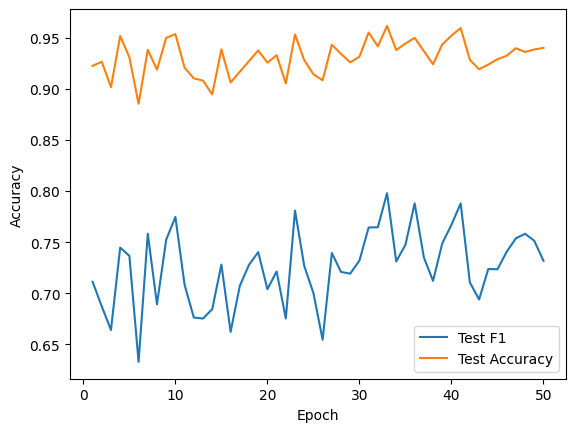

Best Accuracy: {'Acc': 0.9615857406269207, 'F1': 0.7979527636461943, 'Epoch': 33}
Best Macro-F1: {'Acc': 0.9615857406269207, 'F1': 0.7979527636461943, 'Epoch': 33}
##################################################  Shift -0.2  ##################################################


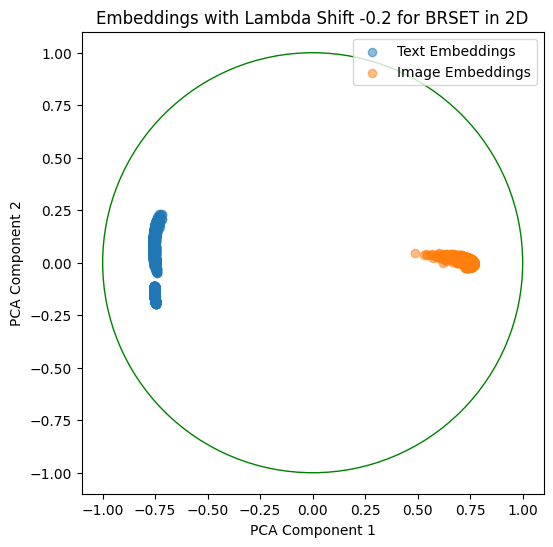

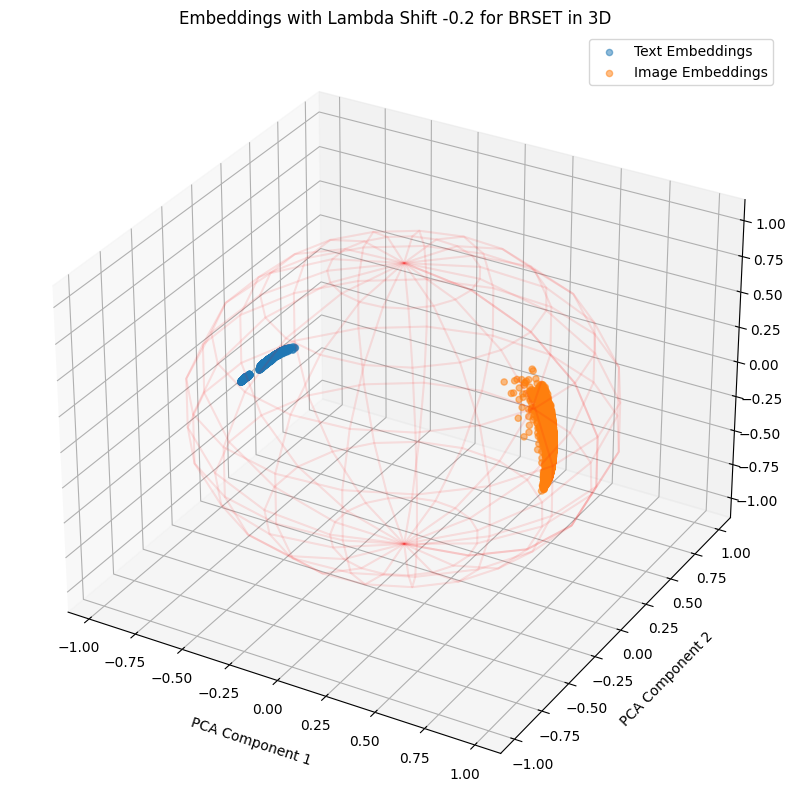

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721667
Average Training Time per Epoch: 2.01 seconds
Total Training Time per Epoch: 100.28 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.08 seconds


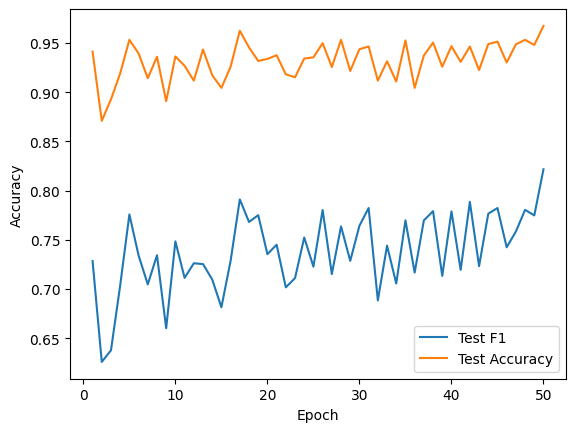

Best Accuracy: {'Acc': 0.9674247080516287, 'F1': 0.8216767035073552, 'Epoch': 50}
Best Macro-F1: {'Acc': 0.9674247080516287, 'F1': 0.8216767035073552, 'Epoch': 50}
Training Late Fusion Model:
The number of parameters of the model are: 361219
Average Training Time per Epoch: 2.08 seconds
Total Training Time per Epoch: 103.78 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.05 seconds


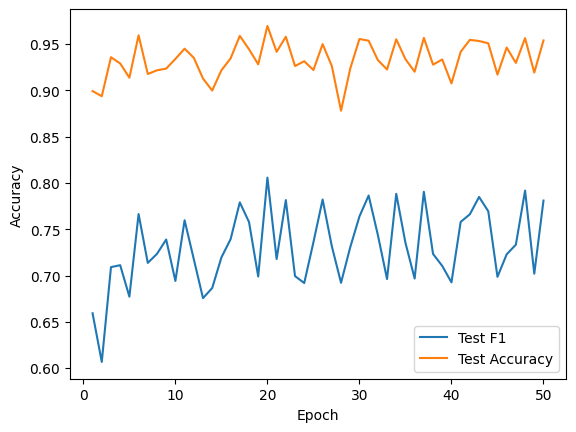

Best Accuracy: {'Acc': 0.9695759065765212, 'F1': 0.8057038502251977, 'Epoch': 20}
Best Macro-F1: {'Acc': 0.9695759065765212, 'F1': 0.8057038502251977, 'Epoch': 20}
##################################################  Shift 0  ##################################################


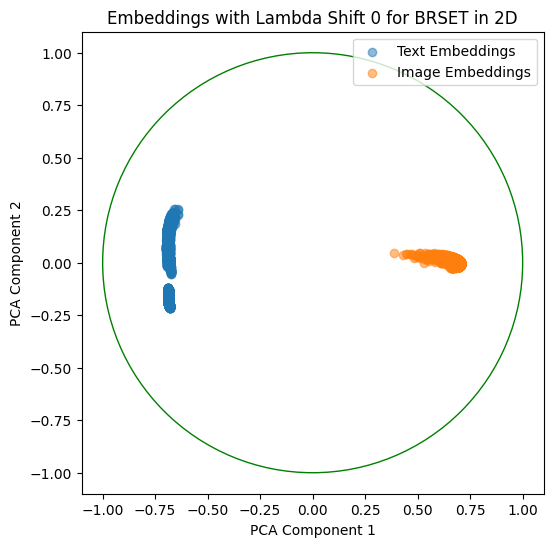

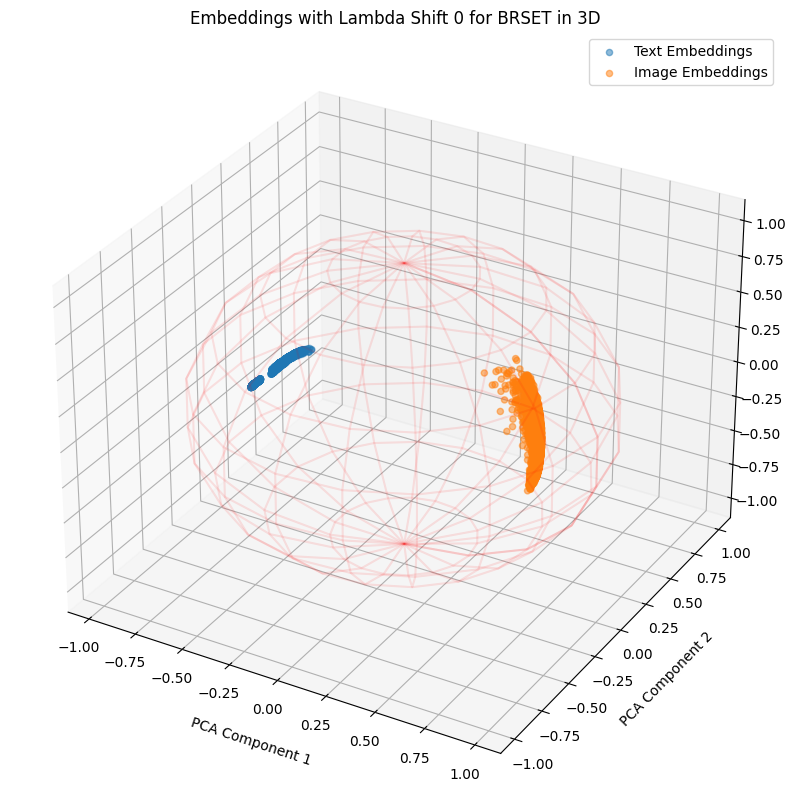

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721667
Average Training Time per Epoch: 1.95 seconds
Total Training Time per Epoch: 97.66 seconds
Average Inference Time per Epoch: 0.51 seconds
Total Inference Time per Epoch: 25.38 seconds


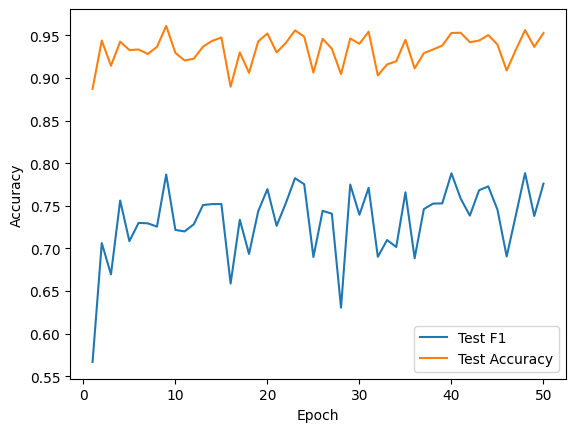

Best Accuracy: {'Acc': 0.9609711124769514, 'F1': 0.7867925779767792, 'Epoch': 9}
Best Macro-F1: {'Acc': 0.9560540872771973, 'F1': 0.7883246818721757, 'Epoch': 48}
Training Late Fusion Model:
The number of parameters of the model are: 361219
Average Training Time per Epoch: 2.02 seconds
Total Training Time per Epoch: 100.90 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.23 seconds


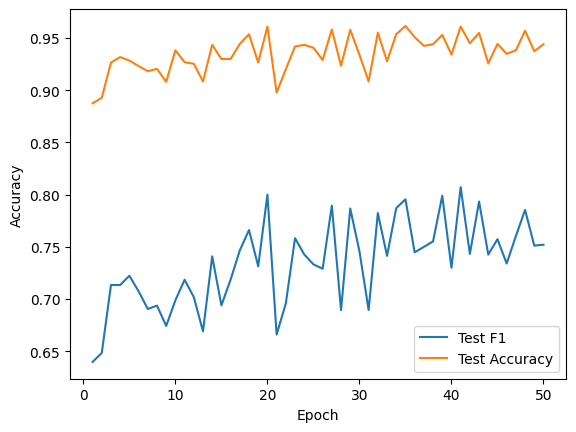

Best Accuracy: {'Acc': 0.9615857406269207, 'F1': 0.7955421515537665, 'Epoch': 35}
Best Macro-F1: {'Acc': 0.9609711124769514, 'F1': 0.8072127935964754, 'Epoch': 41}
##################################################  Shift 0.2  ##################################################


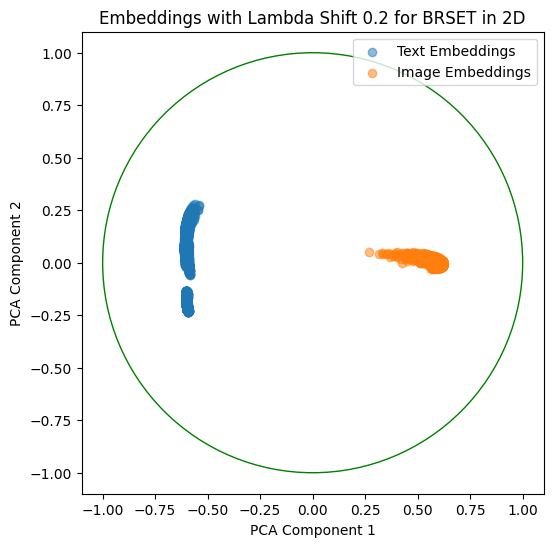

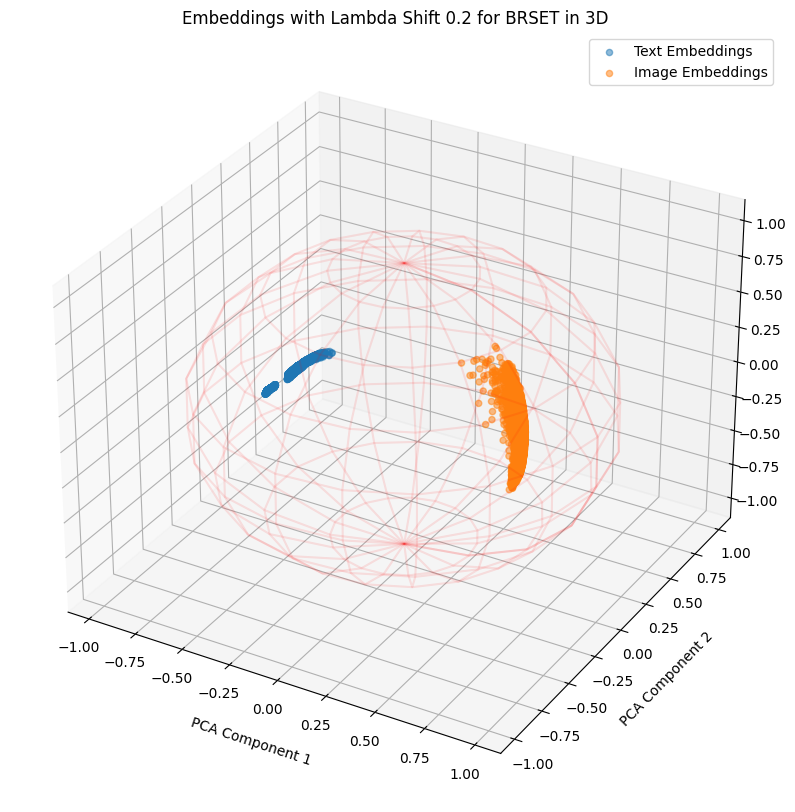

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721667
Average Training Time per Epoch: 2.02 seconds
Total Training Time per Epoch: 100.87 seconds
Average Inference Time per Epoch: 0.49 seconds
Total Inference Time per Epoch: 24.50 seconds


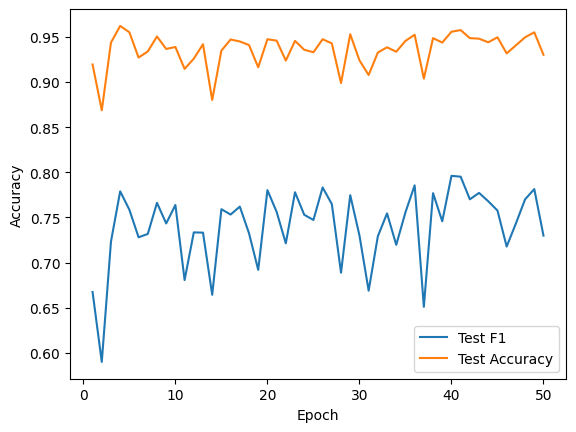

Best Accuracy: {'Acc': 0.96220036877689, 'F1': 0.7789504146400866, 'Epoch': 4}
Best Macro-F1: {'Acc': 0.9557467732022127, 'F1': 0.7961215254496494, 'Epoch': 40}
Training Late Fusion Model:
The number of parameters of the model are: 361219
Average Training Time per Epoch: 2.06 seconds
Total Training Time per Epoch: 103.12 seconds
Average Inference Time per Epoch: 0.49 seconds
Total Inference Time per Epoch: 24.48 seconds


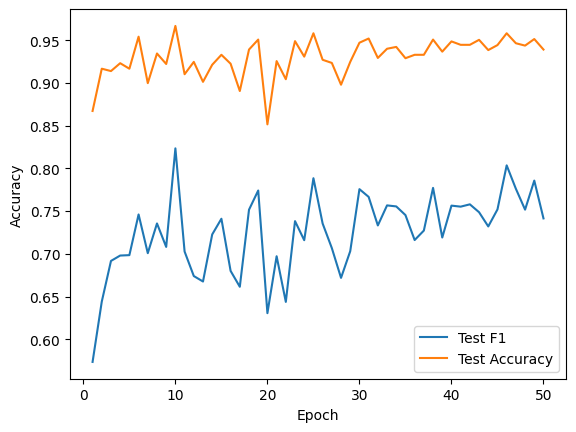

Best Accuracy: {'Acc': 0.9668100799016595, 'F1': 0.823468078924992, 'Epoch': 10}
Best Macro-F1: {'Acc': 0.9668100799016595, 'F1': 0.823468078924992, 'Epoch': 10}
##################################################  Shift 0.4  ##################################################


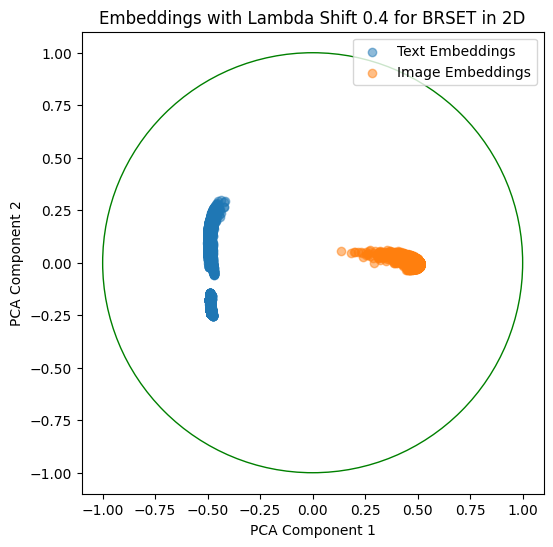

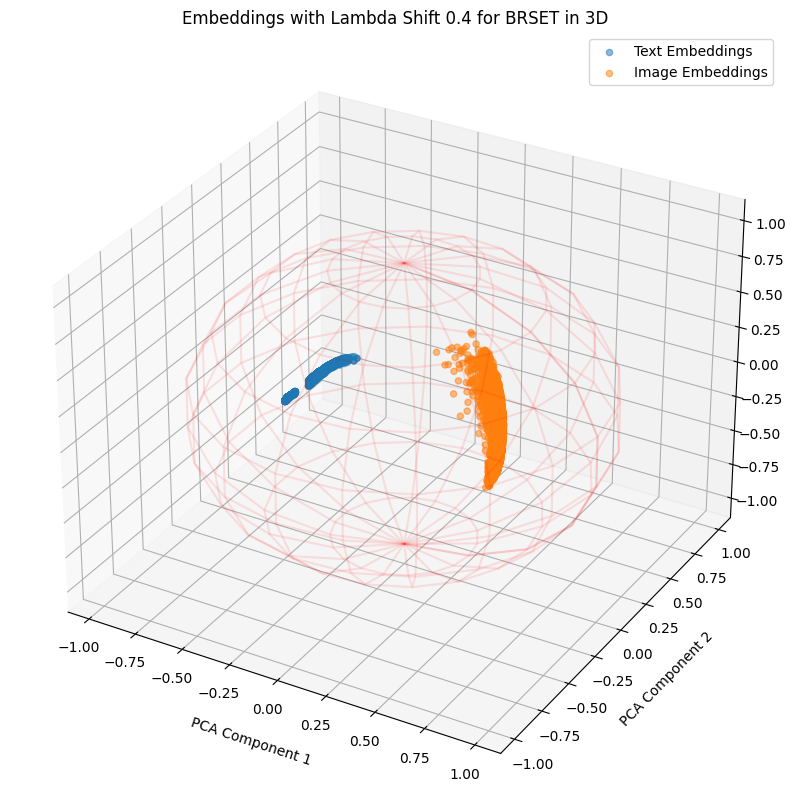

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721667
Average Training Time per Epoch: 1.93 seconds
Total Training Time per Epoch: 96.75 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.22 seconds


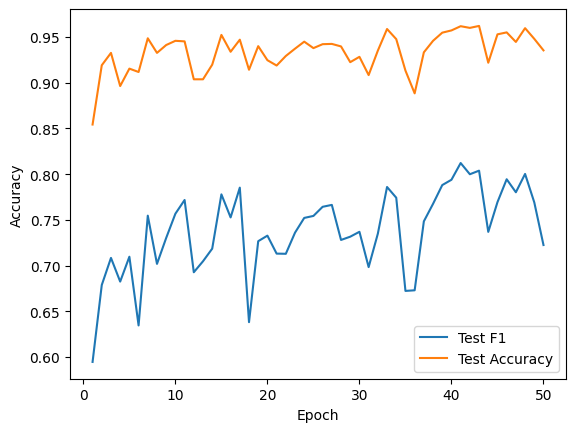

Best Accuracy: {'Acc': 0.96220036877689, 'F1': 0.8038797596198775, 'Epoch': 43}
Best Macro-F1: {'Acc': 0.9618930547019053, 'F1': 0.8122165323520983, 'Epoch': 41}
Training Late Fusion Model:
The number of parameters of the model are: 361219
Average Training Time per Epoch: 2.05 seconds
Total Training Time per Epoch: 102.54 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.05 seconds


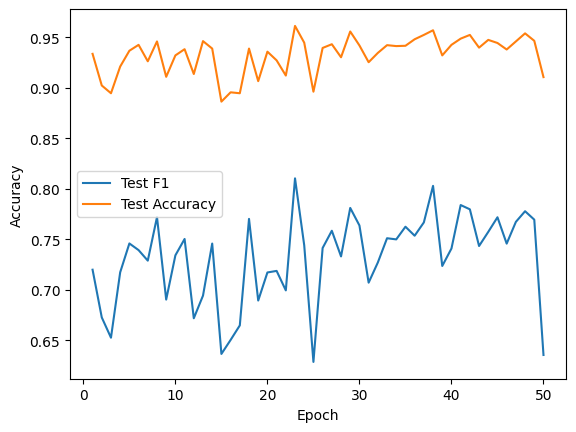

Best Accuracy: {'Acc': 0.9612784265519361, 'F1': 0.8102961609587284, 'Epoch': 23}
Best Macro-F1: {'Acc': 0.9612784265519361, 'F1': 0.8102961609587284, 'Epoch': 23}
##################################################  Shift 0.6  ##################################################


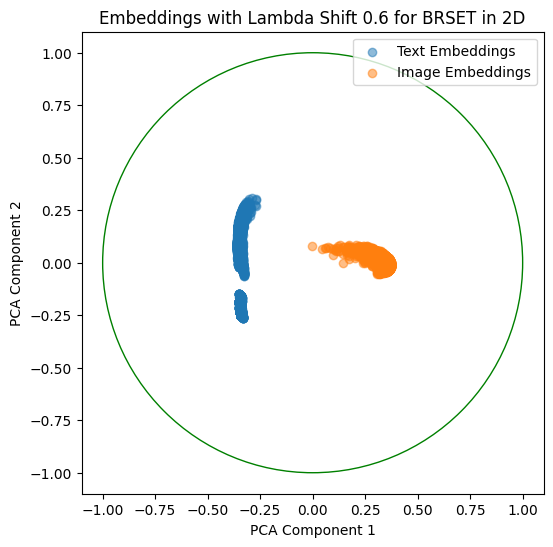

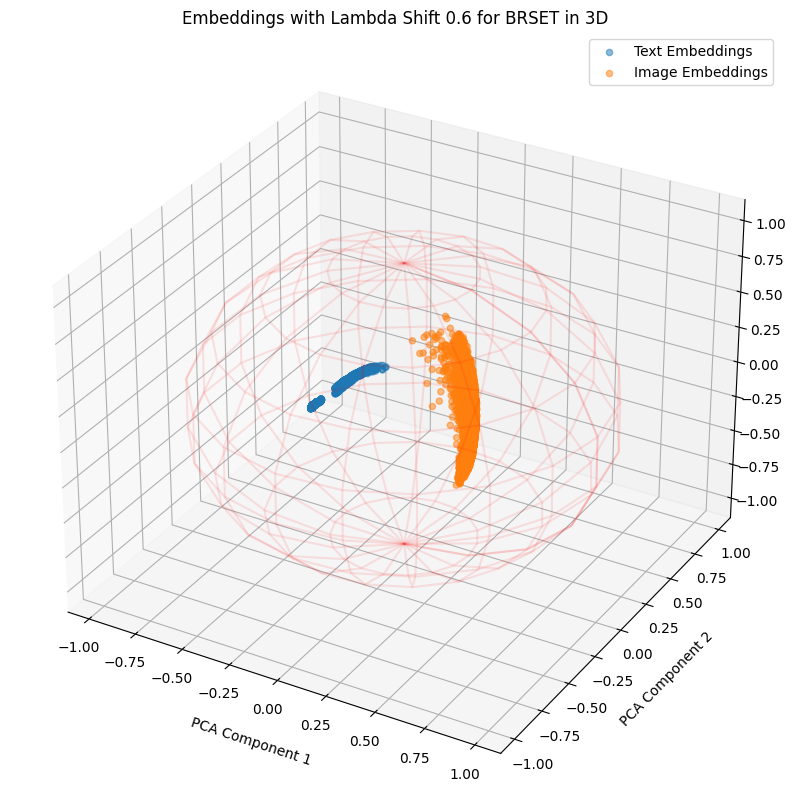

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721667
Average Training Time per Epoch: 1.90 seconds
Total Training Time per Epoch: 95.18 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.00 seconds


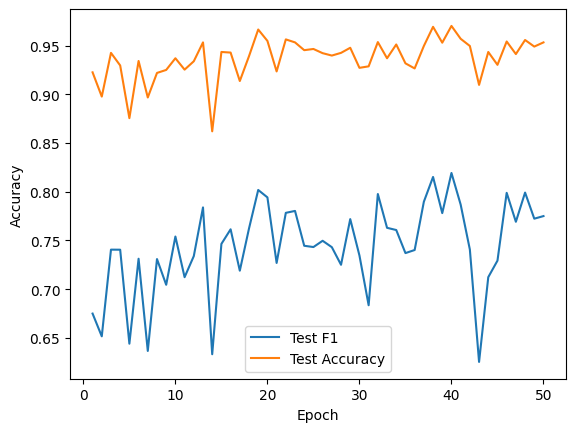

Best Accuracy: {'Acc': 0.9701905347264905, 'F1': 0.8192575874853077, 'Epoch': 40}
Best Macro-F1: {'Acc': 0.9701905347264905, 'F1': 0.8192575874853077, 'Epoch': 40}
Training Late Fusion Model:
The number of parameters of the model are: 361219
Average Training Time per Epoch: 2.05 seconds
Total Training Time per Epoch: 102.53 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 24.80 seconds


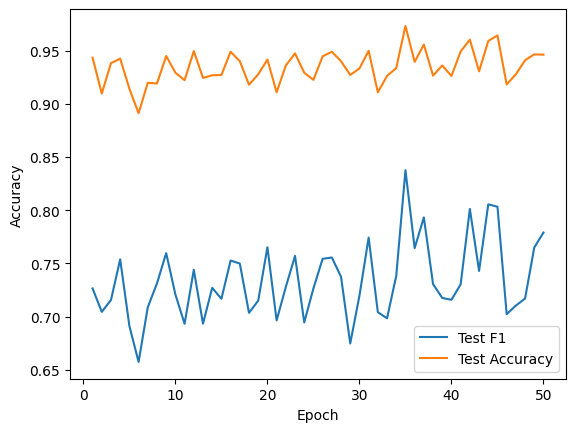

Best Accuracy: {'Acc': 0.9732636754763369, 'F1': 0.8376447071182463, 'Epoch': 35}
Best Macro-F1: {'Acc': 0.9732636754763369, 'F1': 0.8376447071182463, 'Epoch': 35}
##################################################  Shift 0.8  ##################################################


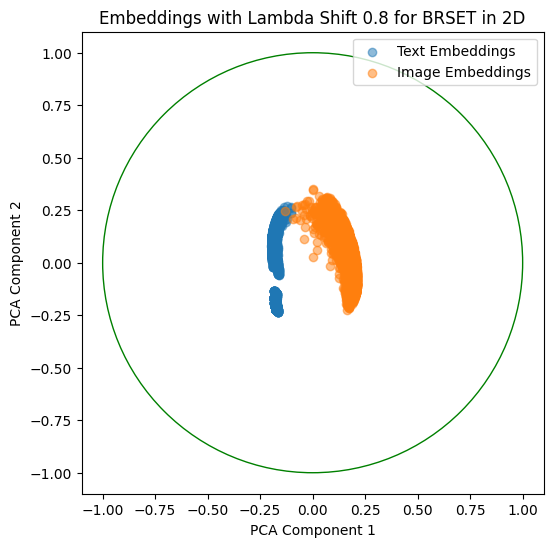

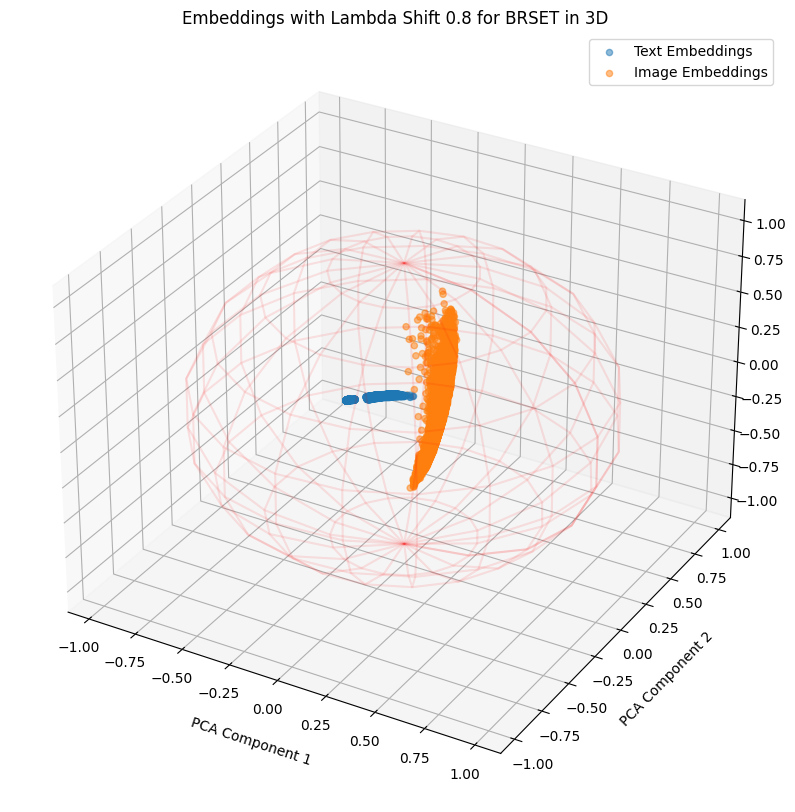

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721667
Average Training Time per Epoch: 1.90 seconds
Total Training Time per Epoch: 95.24 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 24.99 seconds


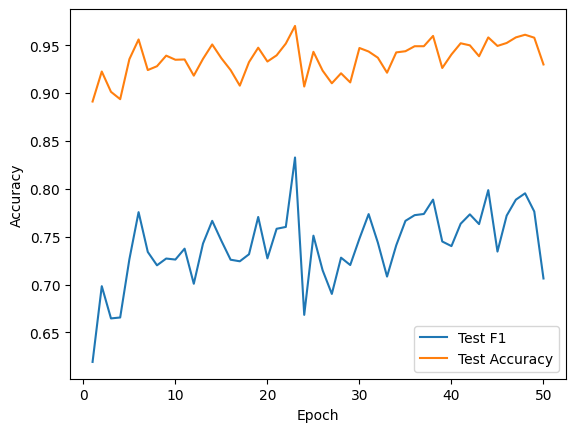

Best Accuracy: {'Acc': 0.9701905347264905, 'F1': 0.8327688230978398, 'Epoch': 23}
Best Macro-F1: {'Acc': 0.9701905347264905, 'F1': 0.8327688230978398, 'Epoch': 23}
Training Late Fusion Model:
The number of parameters of the model are: 361219
Average Training Time per Epoch: 2.03 seconds
Total Training Time per Epoch: 101.65 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 24.79 seconds


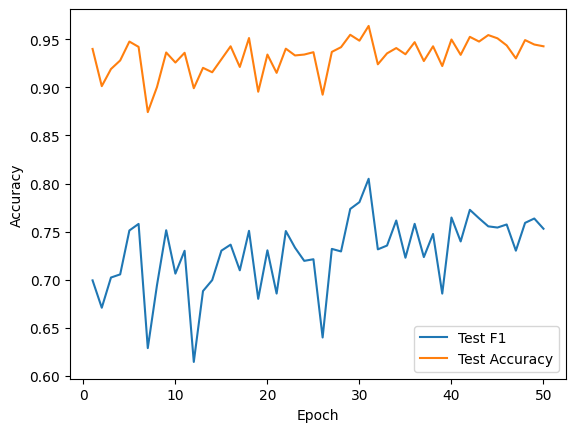

Best Accuracy: {'Acc': 0.9640442532267978, 'F1': 0.8049275914436439, 'Epoch': 31}
Best Macro-F1: {'Acc': 0.9640442532267978, 'F1': 0.8049275914436439, 'Epoch': 31}
##################################################  Shift 1  ##################################################


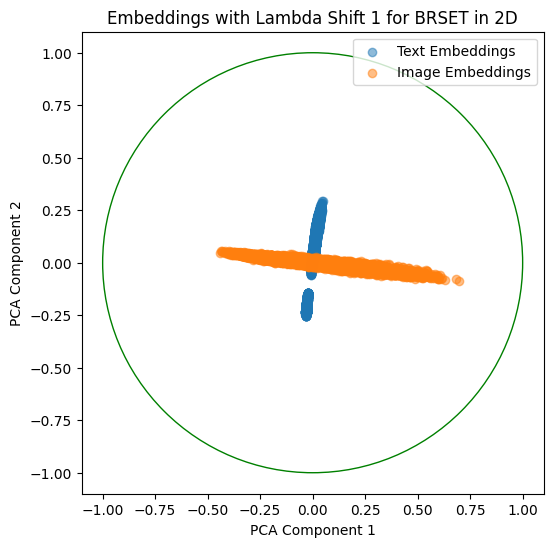

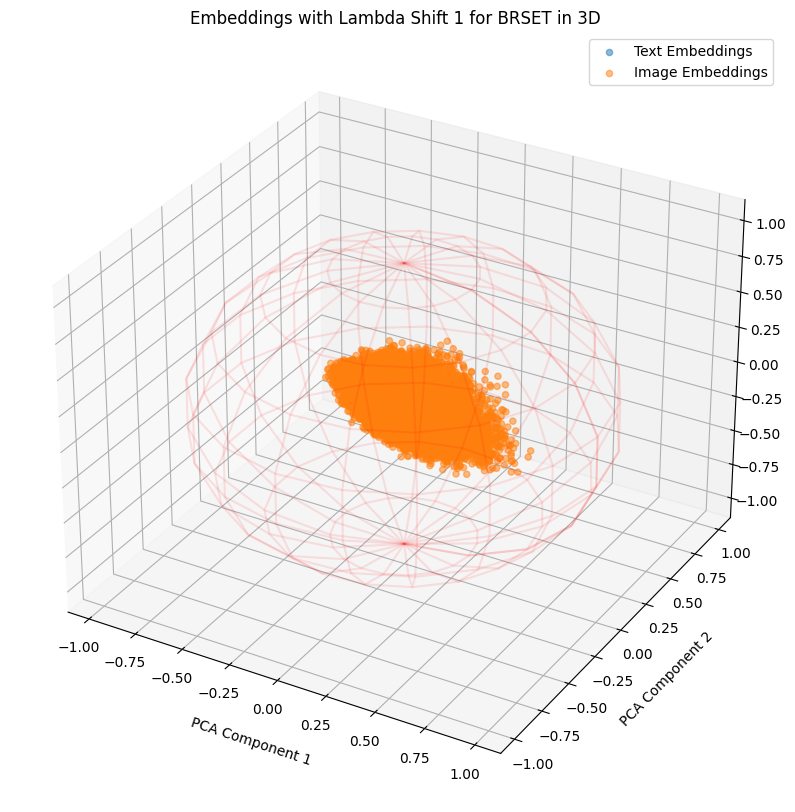

Train Shape: (13012, 8197)
Test Shape: (3254, 8197)
Training Early Fusion Model:
The number of parameters of the model are: 721667
Average Training Time per Epoch: 1.95 seconds
Total Training Time per Epoch: 97.73 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.04 seconds


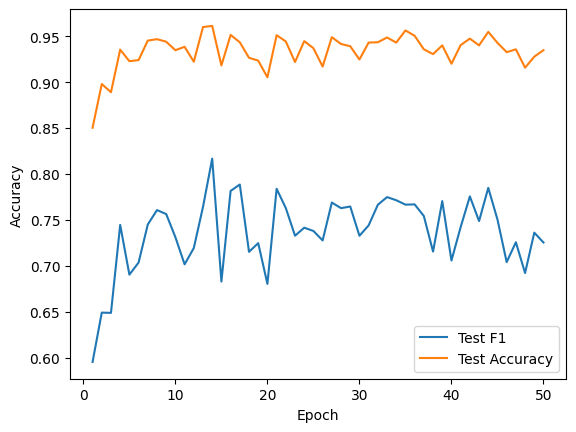

Best Accuracy: {'Acc': 0.9612784265519361, 'F1': 0.8167171748364056, 'Epoch': 14}
Best Macro-F1: {'Acc': 0.9612784265519361, 'F1': 0.8167171748364056, 'Epoch': 14}
Training Late Fusion Model:
The number of parameters of the model are: 361219
Average Training Time per Epoch: 2.03 seconds
Total Training Time per Epoch: 101.74 seconds
Average Inference Time per Epoch: 0.50 seconds
Total Inference Time per Epoch: 25.01 seconds


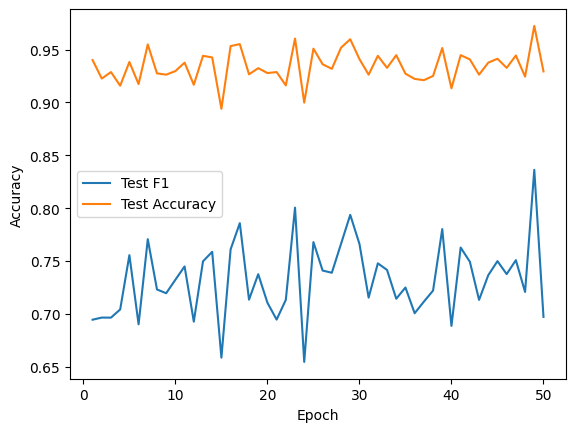

Best Accuracy: {'Acc': 0.972341733251383, 'F1': 0.8362688388639946, 'Epoch': 49}
Best Macro-F1: {'Acc': 0.972341733251383, 'F1': 0.8362688388639946, 'Epoch': 49}


In [6]:
# Assuming df is your DataFrame
lambda_shift_values = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # Negative values bring embeddings closer, positive values push them apart
#lambda_shift_values = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]  # Negative values bring embeddings closer, positive values push them apart

# Normalize initial embeddings
df[text_columns] = normalize_embeddings(df[text_columns].values)
df[image_columns] = normalize_embeddings(df[image_columns].values)

# Dataframe with shifted values:
df_shifted = df.copy()

results = {}

for lambda_shift in lambda_shift_values:
    
    print('#'*50, f' Shift {lambda_shift} ', '#'*50)
    
    # Extract embeddings
    text_embeddings = df[text_columns].values
    image_embeddings = df[image_columns].values
    
    # Modify and normalize embeddings
    text_embeddings_shifted, image_embeddings_shifted = modify_and_normalize_embeddings(text_embeddings, image_embeddings, lambda_shift)
    
    # Update column names based on the new dimensions
    if text_embeddings.shape[1] < text_embeddings_shifted.shape[1]:
        text_columns_updated = update_column_names(text_columns, text_embeddings_shifted.shape[1])
    else: 
        text_columns_updated = text_columns
        
    if image_embeddings.shape[1] < image_embeddings_shifted.shape[1]: 
        image_columns_updated = update_column_names(image_columns, image_embeddings_shifted.shape[1])
    else:
        image_columns_updated = image_columns
    
    # Update DataFrame with shifted embeddings
    df_shifted[text_columns_updated] = text_embeddings_shifted
    df_shifted[image_columns_updated] = image_embeddings_shifted
    
    # Visualize shifted embeddings
    visualize_embeddings(text_embeddings_shifted, image_embeddings_shifted, f'Embeddings with Lambda Shift {lambda_shift} for {DATASET}', lambda_shift, DATASET)
    
    # Split the data
    train_df, test_df = split_data(df_shifted)
    
    
    # Process and one-hot encode labels for training set
    train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
    test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

    train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
    test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    text_input_size = len(text_columns)
    image_input_size = len(image_columns)

    ### Models:
    # Train early fusion model
    print("Training Early Fusion Model:")
    accuracy, precision, recall, f1, best = train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"early_({lambda_shift})"] = best
    
    # Train late fusion model
    print("Training Late Fusion Model:")
    accuracy, precision, recall, f1, best = train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"late_({lambda_shift})"] = best

In [7]:
print('Results Early Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'early_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'early_({lambda_shift})']['Macro-F1']}")
    
print('Results Late Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'late_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'late_({lambda_shift})']['Macro-F1']}")

Results Early Fusion: 
Shift = -1
Best Accuracy: {'Acc': 0.9668100799016595, 'F1': 0.8155091552568176, 'Epoch': 45}
Best F1: {'Acc': 0.9668100799016595, 'F1': 0.8155091552568176, 'Epoch': 45}
Shift = -0.8
Best Accuracy: {'Acc': 0.9686539643515673, 'F1': 0.7899733450177092, 'Epoch': 27}
Best F1: {'Acc': 0.9671173939766441, 'F1': 0.8195753955557876, 'Epoch': 15}
Shift = -0.6
Best Accuracy: {'Acc': 0.9701905347264905, 'F1': 0.8181626002904973, 'Epoch': 13}
Best F1: {'Acc': 0.9701905347264905, 'F1': 0.8181626002904973, 'Epoch': 13}
Shift = -0.4
Best Accuracy: {'Acc': 0.9643515673017824, 'F1': 0.8155999007815903, 'Epoch': 36}
Best F1: {'Acc': 0.9643515673017824, 'F1': 0.8155999007815903, 'Epoch': 36}
Shift = -0.2
Best Accuracy: {'Acc': 0.9674247080516287, 'F1': 0.8216767035073552, 'Epoch': 50}
Best F1: {'Acc': 0.9674247080516287, 'F1': 0.8216767035073552, 'Epoch': 50}
Shift = 0
Best Accuracy: {'Acc': 0.9609711124769514, 'F1': 0.7867925779767792, 'Epoch': 9}
Best F1: {'Acc': 0.95605408727719

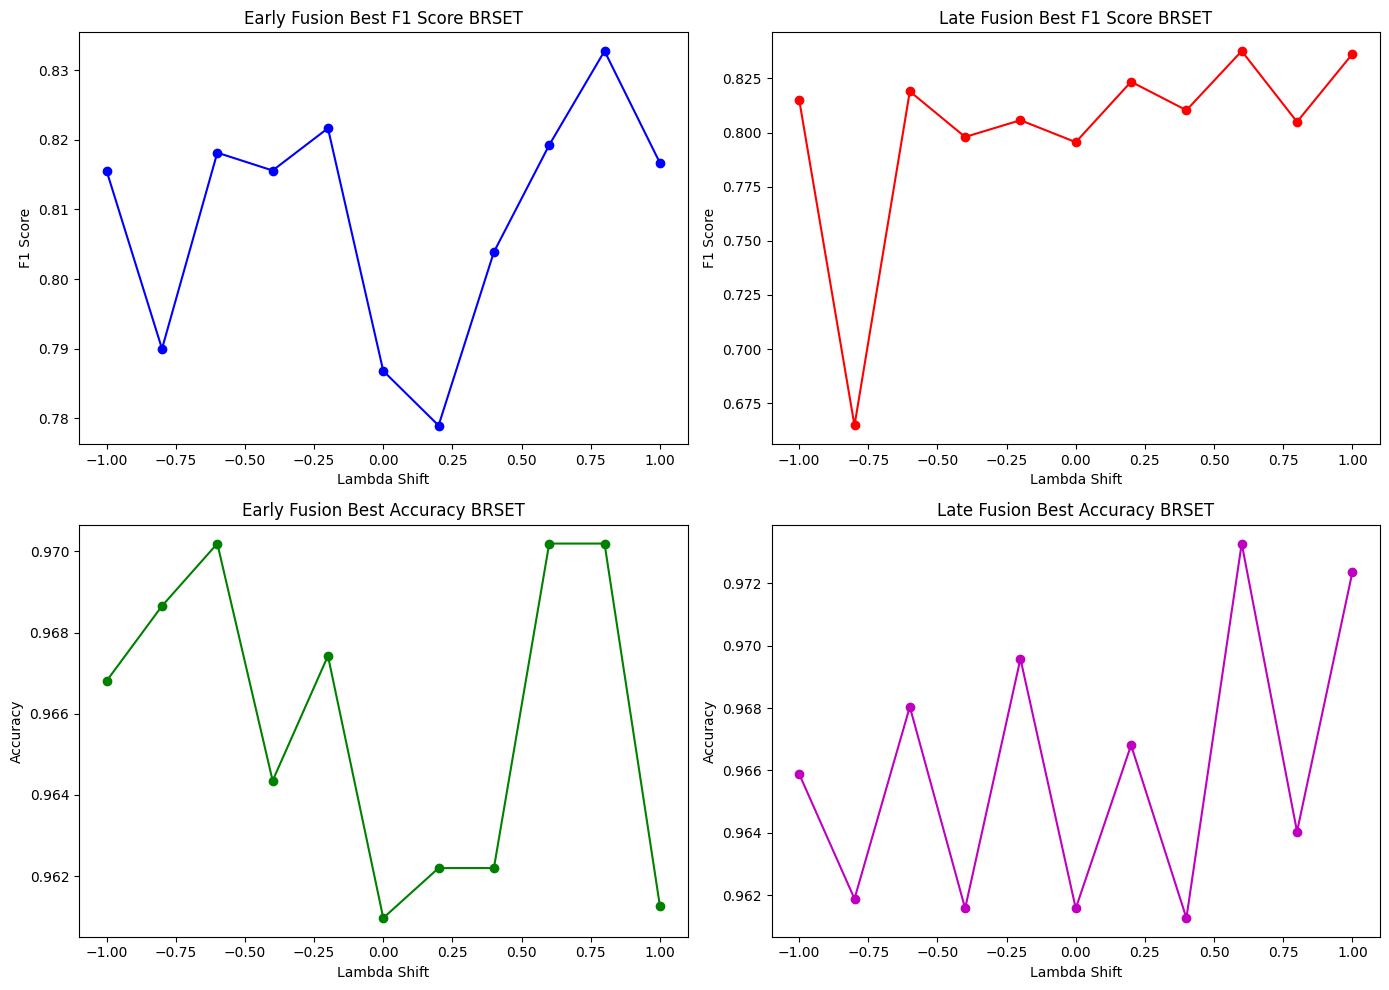

In [8]:
plot_results(results, lambda_shift_values, DATASET)